# Model for durable housing

In this notebook, I illustrate the results from the model.
As more of the model is solved, I'll add some results to this notebook

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

# load the DurableConsumptionModel module
from DurableConsumptionModel import DurableConsumptionModelClass

# Set the number of threads in numba
nb.set_num_threads(4)

In [2]:
# Something for figure layout

Solve and simulate the model

In [67]:
# Set time horizon
T = 500

# Define the model
model = DurableConsumptionModelClass(name='example_negm',par={'solmethod':'negm','T':T,'do_print':False})

# Solve and simulate
model.precompile_numba()
model.solve()
model.simulate()

Plot policy functions

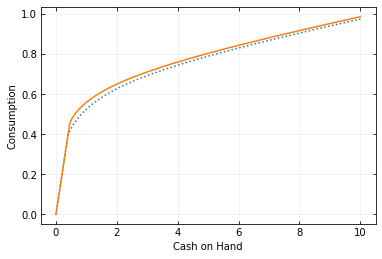

In [68]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(model.par.grid_m, model.sol.c_keep[0,1,0,1,:], linestyle = ':')
ax.plot(model.par.grid_m, model.sol.c_keep[0,1,1,1,:])


# Plot setting
ax.set_xlabel('Cash on Hand')
ax.set_ylabel('Consumption')

# ax.set_xlim(0,len(x_pareto))
# ax.set_ylim(1,50)
ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

Show convergence

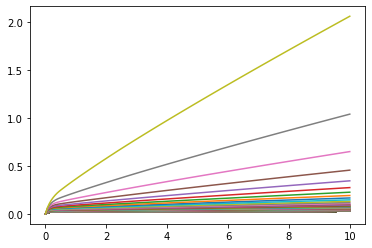

In [69]:
for t in range(T-1):
    plt.plot(model.par.grid_m, model.sol.inv_v_adj[t,0,1,:])

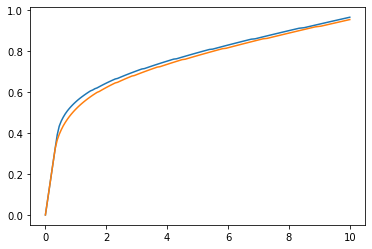

In [79]:
plt.plot(model.par.grid_m, model.sol.c_adj[0,1,1,:])
plt.plot(model.par.grid_m, model.sol.c_adj[0,1,0,:])

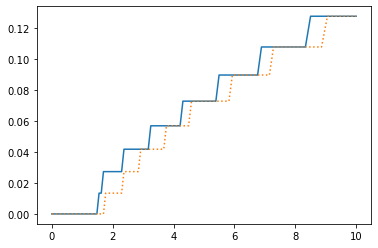

In [71]:
plt.plot(model.par.grid_m, model.sol.d_adj[0,0,1,:], linestyle = '-')
plt.plot(model.par.grid_m, model.sol.d_adj[0,0,0,:], linestyle = ':')

In [73]:
w = model.sim.m + model.par.ph*model.sim.d
m = model.sim.m

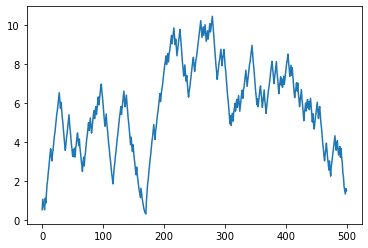

In [78]:
plt.plot(m[:,100])
# plt.scatter(range(model.par.T),model.sim.n[:,0])

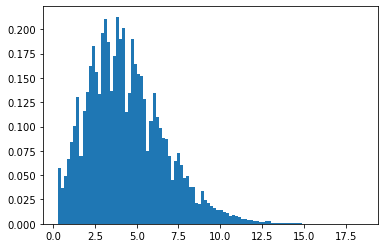

In [95]:
plt.hist(w[400,:], bins = 100, density = True)
plt.show()

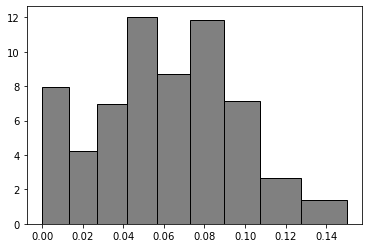

In [101]:
plt.hist(model.sim.n[450,:], bins = model.par.grid_n, density = True, facecolor='0.5', edgecolor = 'k')
plt.show()